# EMNIST辨識

## 步驟1：載入 EMNIST

In [1]:
!pip install emnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [3]:
from emnist import extract_training_samples
x_train, y_train = extract_training_samples('balanced')
from emnist import extract_test_samples
x_test, y_test = extract_test_samples('balanced')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((112800, 28, 28), (112800,), (18800, 28, 28), (18800,))

## 步驟2：資料探索

In [4]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([45, 36, 43, 15,  4, 42, 26, 32, 20,  1], dtype=uint8)

In [5]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出為英文字母小寫 r
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000111000000011111111100000',
 '0011111110011111111111111000',
 '0011111111111111111111111100',
 '0011111111111111111111111100',
 '0011111111111111111111111100',
 '0011111111111111111111111100',
 '0011111111111111111111111000',
 '0001111111111111111111110000',
 '0000111111111111000000000000',
 '0000111111111111000000000000',
 '0000111111111111000000000000',
 '0000001111111111000000000000',
 '0000001111111111000000000000',
 '0000000111111111000000000000',
 '0000000111111110000000000000',
 '0000000001111000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [7]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出為英文字母小寫 a
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111110000000000',
 '0000000000111111111000000000',
 '0000000001111111111100000000',
 '0000000011111111111110000000',
 '0000000001111111111110000000',
 '0000000000110001111110000000',
 '0000000000000111111111000000',
 '0000000000111111111111000000',
 '0000000011111111111111000000',
 '0000000111111111111111000000',
 '0000000111111111111110000000',
 '0000001111111001111110000000',
 '0000001111111001111110000000',
 '0000001111110011111110000000',
 '0000000111111111111110000000',
 '0000000111111111111110000000',
 '0000000111111111111110000000',
 '0000000011111111111100000000',
 '0000000001111111111100000000',
 '0000000000011111111110000000',
 '0000000000001111111111000000',
 '0000000000001111111111000000',
 '0000000000000111111111000000',
 '0000000000000001111110000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

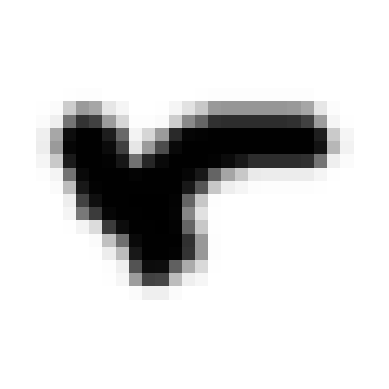

In [8]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='Greys') # gray

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

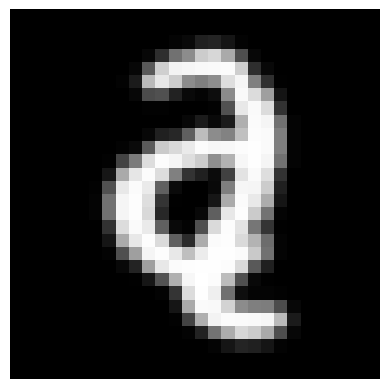

In [9]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[1,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

In [10]:
y_train = y_train -1
y_test = y_test -1

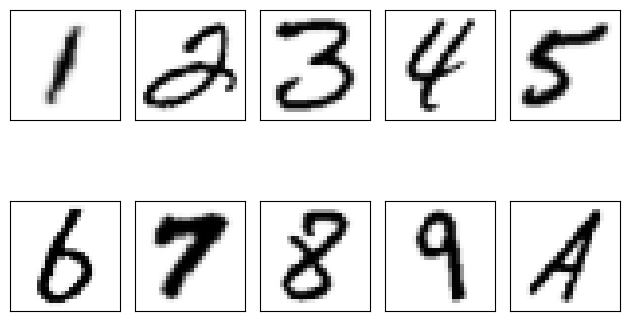

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    try:
        img = x_train[y_train == i][0].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys')
    except:
        print(i)

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

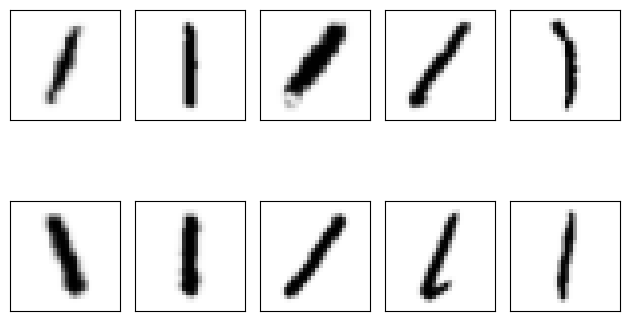

In [12]:
no=0
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [13]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [14]:
# 建立模型
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(26, activation='softmax')
])

In [15]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer='adam',
              loss=loss, # "mean_squared_error", #'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [16]:
# 模型訓練
# callback: https://ithelp.ithome.com.tw/articles/10234641
# 自訂 callback: https://ithelp.ithome.com.tw/articles/10235293
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
2820/2820 [==============================] - 15s 3ms/step - loss: nan - accuracy: 0.0212 - val_loss: nan - val_accuracy: 0.0215
Epoch 2/5
2820/2820 [==============================] - 10s 4ms/step - loss: nan - accuracy: 0.0212 - val_loss: nan - val_accuracy: 0.0215
Epoch 3/5
2820/2820 [==============================] - 9s 3ms/step - loss: nan - accuracy: 0.0212 - val_loss: nan - val_accuracy: 0.0215
Epoch 4/5
2820/2820 [==============================] - 10s 3ms/step - loss: nan - accuracy: 0.0212 - val_loss: nan - val_accuracy: 0.0215
Epoch 5/5
2820/2820 [==============================] - 9s 3ms/step - loss: nan - accuracy: 0.0212 - val_loss: nan - val_accuracy: 0.0215


In [17]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 39511 (\N{CJK UNIFIED IDEOGRAPH-9A57}) m

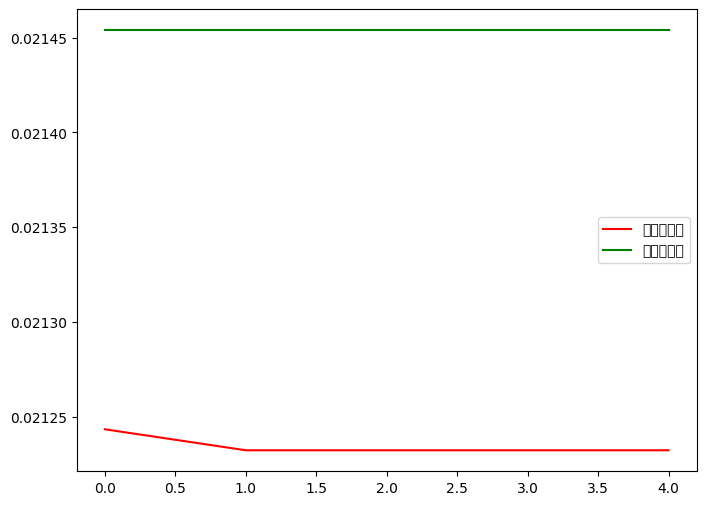

In [18]:
# 對訓練過程的準確率繪圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


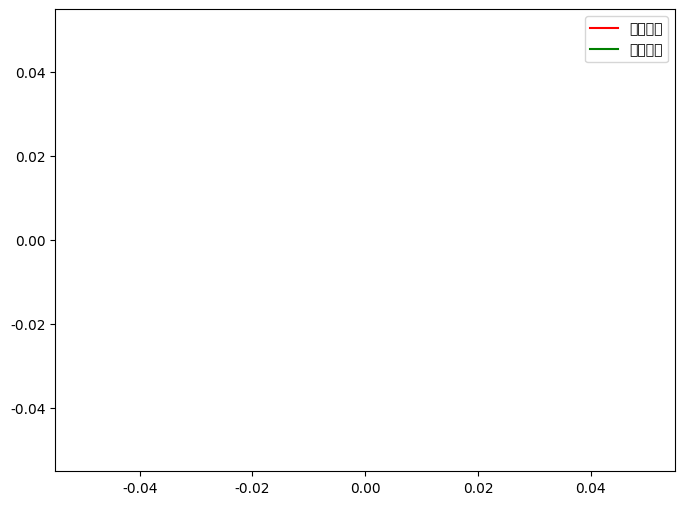

In [19]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

## 步驟7：評分(Score Model)

In [20]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: nan
accuracy: 0.0213


In [21]:
y_test[0:20]

array([40, 38,  8, 25, 43, 32, 13, 10,  2, 11, 15,  6,  1, 15, 15, 26,  5,
       43, 27, 44], dtype=uint8)

In [22]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', ' '.join(y_test[0:20].astype(str)))
print('prediction:', ' '.join(predictions[0:20].astype(str)))

588/588 [==============================] - 1s 2ms/step
actual    : 40 38 8 25 43 32 13 10 2 11 15 6 1 15 15 26 5 43 27 44
prediction: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [23]:
# 顯示第 4 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[3:4])
print(f'0~9預測機率: {np.around(predictions, 2)}')

1/1 [==============================] - 0s 41ms/step
0~9預測機率: [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan]]


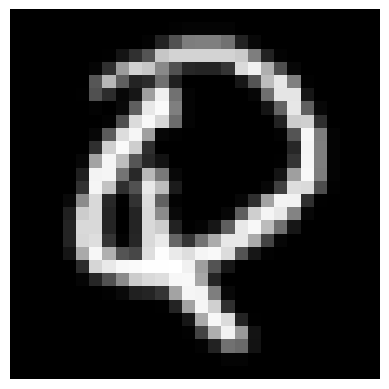

In [24]:
# 顯示第 4 筆圖像
X2 = x_test[3,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

In [25]:
chr(ord('A')+16)

'Q'

## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [26]:
# 模型存檔
model.save('model.h5')

# 模型載入
model = tf.keras.models.load_model('model.h5')

## 'balanced' 資料集可使用 emnist-balanced-mapping.txt，產生Lable對照表

In [27]:
with open('/content/emnist-balanced-mapping.txt') as f:  # emnist-balanced-mapping.txt 檔案內容為"索引值" 對應 "ASCII code"; 於 Kaggle 下載: https://www.kaggle.com/datasets/crawford/emnist?select=emnist-balanced-mapping.txt
    lines = f.readlines()
    
label_dict = {}
for row in lines:
    list1 = row.split(' ')
    label_dict[int(list1[0])] = chr(int(list1[1]))   #索引值 (list1[0])  對應 ASCII code (list1[1])
label_dict.values()

dict_values(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't'])